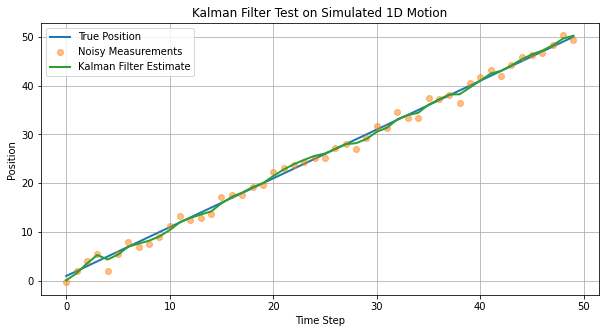

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Simulation Settings
# --------------------------
dt = 1.0            # time step (in seconds)
num_steps = 50      # number of time steps

# True model parameters
# We simulate a simple 1D constant velocity model
# State vector: [position, velocity]
F = np.array([[1, dt],
              [0, 1]], dtype=np.float32)  # State transition matrix
H = np.array([[1, 0]], dtype=np.float32)  # Measurement matrix (we only measure position)

# Noise settings
process_noise_std = 0.1       # Standard deviation for process noise
measurement_noise_std = 1.0   # Standard deviation for measurement noise

# Initial true state: starting at position 0 with velocity 1.
true_state = np.array([[0],
                       [1]], dtype=np.float32)

# Containers for logging simulation data
true_positions = []
measurements = []
estimates = []

# --------------------------
# Kalman Filter Initialization (OpenCV)
# --------------------------
kf = cv2.KalmanFilter(2, 1)  # 2 state variables, 1 measurement
kf.transitionMatrix = np.array([[1, dt],
                                [0, 1]], dtype=np.float32)
kf.measurementMatrix = np.array([[1, 0]], dtype=np.float32)

# Process noise covariance (Q)
kf.processNoiseCov = np.array([[dt**4/4, dt**3/2],
                               [dt**3/2, dt**2]], dtype=np.float32) * process_noise_std**2

# Measurement noise covariance (R)
kf.measurementNoiseCov = np.array([[measurement_noise_std**2]], dtype=np.float32)

# Posterior error covariance matrix (P)
kf.errorCovPost = np.eye(2, dtype=np.float32)

# Initial state estimate
kf.statePost = np.array([[0],
                         [1]], dtype=np.float32)

# --------------------------
# Simulation Loop
# --------------------------
for i in range(num_steps):
    # ----- True State Update -----
    true_state = np.dot(F, true_state)
    true_positions.append(true_state[0, 0])
    
    # ----- Measurement Simulation -----
    # Generate a noisy measurement. We explicitly convert the noise to float32.
    noise = (np.random.randn(1, 1).astype(np.float32) * measurement_noise_std)
    measurement = np.dot(H, true_state) + noise
    measurements.append(measurement[0, 0])
    
    # ----- Kalman Filter Prediction and Correction -----
    kf.predict()
    kf.correct(measurement)
    estimate = kf.statePost[0, 0]
    estimates.append(estimate)

# --------------------------
# Plotting the Results
# --------------------------
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label='True Position', linewidth=2)
plt.plot(measurements, 'o', label='Noisy Measurements', alpha=0.5)
plt.plot(estimates, label='Kalman Filter Estimate', linewidth=2)
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.title('Kalman Filter Test on Simulated 1D Motion')
plt.legend()
plt.grid(True)
plt.show()
